In [13]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import sympy
import traj.segmented_trajectory
sympy.init_printing()

delta_0, delta_1, delta_2 = sympy.symbols('delta_0, delta_1, delta_2')

j_max, p_start, v_start, a_start, p_end, v_end, a_end = sympy.symbols(
    'j_max, p_start, v_start, a_start, p_end, v_end, a_end')

trajectory = traj.segmented_trajectory.SegmentedTrajectory(
    2.0, 1.0, 1.0,
    [1, -1, 1],
    0.0, 0.0, 0.0,
    2.0, 0.0, 0.0)
p_end_eq = trajectory.state_eq[0]
v_end_eq = trajectory.state_eq[1]
a_end_eq = trajectory.state_eq[2]

p_end_lambda = sympy.lambdify([delta_0, delta_1, delta_2], p_end_eq.rhs.subs(trajectory.subs))
v_end_lambda = sympy.lambdify([delta_0, delta_1, delta_2], v_end_eq.rhs.subs(trajectory.subs))
a_end_lambda = sympy.lambdify([delta_0, delta_1, delta_2], a_end_eq.rhs.subs(trajectory.subs))

display(p_end_eq)
display(v_end_eq)
display(a_end_eq)

In [14]:
delta_0_solution = sympy.solve(a_end_eq, delta_0)[0]
delta_0_lambda = sympy.utilities.lambdify([delta_1, delta_2], delta_0_solution.subs(trajectory.subs))
display(delta_0_solution)

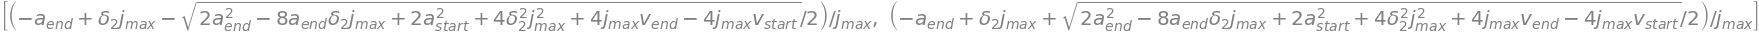

In [15]:
delta_1_solutions = sympy.solve(v_end_eq.subs(delta_0, delta_0_solution), delta_1)
delta_1_lambdas = [sympy.utilities.lambdify([delta_2], solution.subs(trajectory.subs))
                   for solution in delta_1_solutions]
delta_1_solutions

<IPython.core.display.Javascript object>


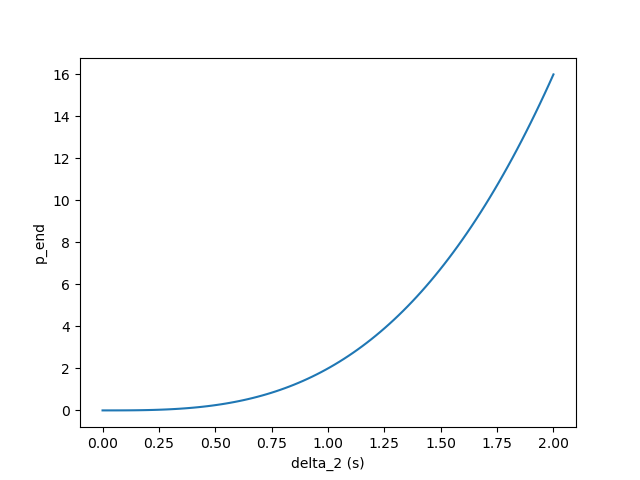

'trajectory.p_end: 2.0'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.50, 3.00, 1.50) p_end: 6.75'

' delta: (1.25, 2.50, 1.25) p_end: 3.91'

' delta: (1.12, 2.25, 1.12) p_end: 2.85'

' delta: (1.06, 2.12, 1.06) p_end: 2.40'

' delta: (1.03, 2.06, 1.03) p_end: 2.19'

' delta: (1.02, 2.03, 1.02) p_end: 2.10'

' delta: (1.01, 2.02, 1.01) p_end: 2.05'

' delta: (1.00, 2.01, 1.00) p_end: 2.02'

' delta: (1.00, 2.00, 1.00) p_end: 2.01'

' delta: (1.00, 2.00, 1.00) p_end: 2.01'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

' delta: (1.00, 2.00, 1.00) p_end: 2.00'

In [23]:
def compute_delta_0_and_1(trajectory, delta_2_val):
    delta_1_solutions[1].subs(trajectory.subs).evalf()
    for delta_1_lambda in delta_1_lambdas:
        delta_1_val = delta_1_lambda(delta_2_val)
        delta_0_val = delta_0_lambda(delta_1_val, delta_2_val)
        if delta_0_val >= 0 and delta_1_val >= 0:
            return delta_0_val, delta_1_val
    return None, None

delta_2_max = 2.0 * trajectory.a_max / trajectory.j_max
delta_2_vals = np.linspace(0.0, delta_2_max, 100)
p_end_vals = []
for delta_2_val in delta_2_vals:
    delta_0_val, delta_1_val = compute_delta_0_and_1(trajectory, delta_2_val)
    if delta_0_val != None and delta_1_val != None:
        p_end_val = p_end_lambda(delta_0_val, delta_1_val, delta_2_val)
        p_end_vals.append(p_end_val)

      
plt.plot(delta_2_vals, p_end_vals)
plt.xlabel('delta_2 (s)')
plt.ylabel('p_end')

# Use binary search to find the zero crossing. (Assumes that there is exactly one)
delta_2_min = 0.0
display('trajectory.p_end: {}'.format(trajectory.p_end))
for ii in range(40):
    delta_2_midpoint = (delta_2_min + delta_2_max) / 2.0
    delta_0_val, delta_1_val = compute_delta_0_and_1(trajectory, delta_2_midpoint)
    if delta_0_val == None and delta_1_val == None:
        raise RuntimeError('No valid values for delta_0 and delta_1')
        
    # min_p_end = p_end_lambda(delta_0_val, delta_1_val, delta_2_min)
    midpoint_p_end = p_end_lambda(delta_0_val, delta_1_val, delta_2_midpoint)
    display(f' delta: ({delta_0_val:.2f}, {delta_1_val:.2f}, {delta_2_midpoint:.2f}) p_end: {midpoint_p_end:.2f}')
    # max_p_end = p_end_lambda(delta_0_val, delta_1_val, delta_2_max)
    
    #display('   '.join(['{:.2f}: {:.2f}'.format(x, y) for x, y in
    #    [(delta_2_min, min_p_end),
    #    (delta_2_midpoint, midpoint_p_end),
    #    (delta_2_max, max_p_end)]]))
    
    if trajectory.p_end > midpoint_p_end:
        delta_2_min = delta_2_midpoint
    else:
        delta_2_max = delta_2_midpoint
delta_2_midpoint

    

In [17]:
deltas = (1., 2., 1.)
p_end_lambda(*deltas), v_end_lambda(*deltas), a_end_lambda(*deltas)